<a href="https://colab.research.google.com/github/Machine-Learning-Robot-Competition/data/blob/main/Letter_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/ENPH353
letter_dir = "/content/drive/MyDrive/ENPH353/letters"
font_filepath = "/content/drive/MyDrive/ENPH353/UbuntuMono-R.ttf"

!ls /content/drive/MyDrive/ENPH353

 Lab2.ipynb     letters      plate_CW41.png   plates		   test_plates
'Lab 5.ipynb'   output.mp4   plate_IU17.png   raw_video_feed.mp4   UbuntuMono-R.ttf
 Lab2.ipynb     letters      plate_CW41.png   plates		   test_plates
'Lab 5.ipynb'   output.mp4   plate_IU17.png   raw_video_feed.mp4   UbuntuMono-R.ttf


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Characters to generate
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Font size
font_size = 48

# Image size
image_width, image_height = 35, 40

# Load the font
font = ImageFont.truetype(font_filepath, size=font_size)

letters = []
img_width = 35
img_height = 40
font_colour = (255, 0, 0)
text_position = (4, -4)
reduced_size = (int(image_width // 1), int(image_height // 1))

# Generate images for each character
for char in characters:
    img = Image.new("RGB", (image_width, image_height), color="white")
    draw = ImageDraw.Draw(img)

    # Calculate text position to center it
    draw.text(text_position, char, font_colour, font=font)

    small_img = img.resize(reduced_size, Image.NEAREST)  # Downscale to a low resolution
    pixelated_img = small_img.resize(img.size, Image.NEAREST)  # Upscale back to original size

    np_img = cv2.bitwise_not(cv2.cvtColor(np.array(pixelated_img), cv2.COLOR_RGB2GRAY))
    _, np_img = cv2.threshold(np_img, 10, 255, cv2.THRESH_BINARY)

    # noise = np.abs(np.random.normal(0, 10, np_img.shape).astype(np.uint8))  # Adjust variance for noise
    # noisy_img = cv2.add(np_img, noise)

    # Save the image
    letters.append(np_img)

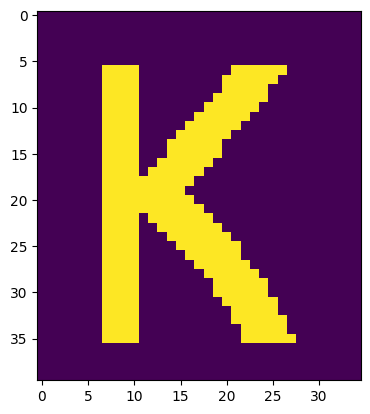

In [ ]:
plt.imshow(letters[10])

In [ ]:
letters[10][8, 20]

255

In [ ]:
noise = np.random.normal(0, 90, (image_height, image_width)).astype(int)

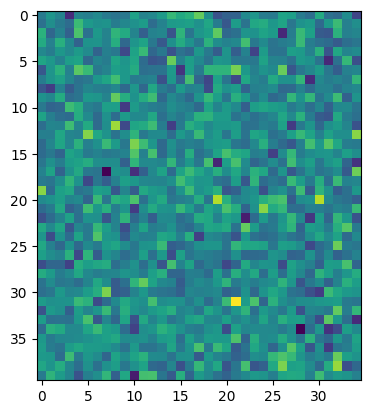

In [ ]:
plt.imshow(noise)

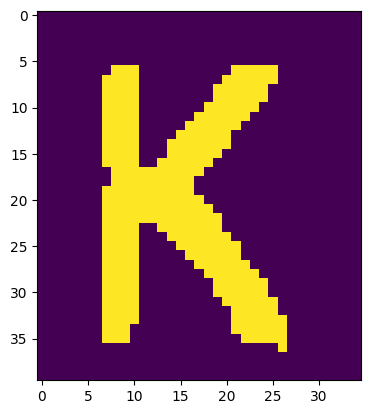

In [ ]:
salted_image = np.clip(letters[10] + noise, a_min=0, a_max=255).astype(np.uint8)
blurred_salted_image = cv2.GaussianBlur(salted_image, (5, 5), 0)
_, thresholded_blurred_salted_image = cv2.threshold(blurred_salted_image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_blurred_salted_image)

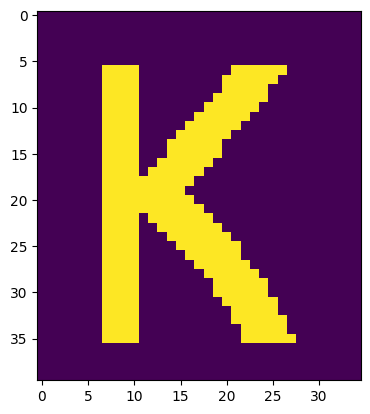

In [ ]:
plt.imshow(letters[10])

In [ ]:
def distort_letter(img):
  low_frequency_std = 80
  high_frequency_std = 10

  high_frequency_magnitude = 5.0
  low_frequency_magnitude = 5.0
  normalization = np.sqrt(low_frequency_magnitude**2 + high_frequency_magnitude**2)

  high_frequency_amplitude = high_frequency_magnitude / normalization
  low_frequency_amplitude = low_frequency_magnitude / normalization

  plt.imshow(noise)

  salted_image = np.clip(img + noise, a_min=0, a_max=255).astype(np.uint8)
  blurred_salted_image = cv2.GaussianBlur(salted_image, (5, 5), 0)
  _, thresholded_blurred_salted_image = cv2.threshold(blurred_salted_image, 128, 255, cv2.THRESH_BINARY)

  return thresholded_blurred_salted_image

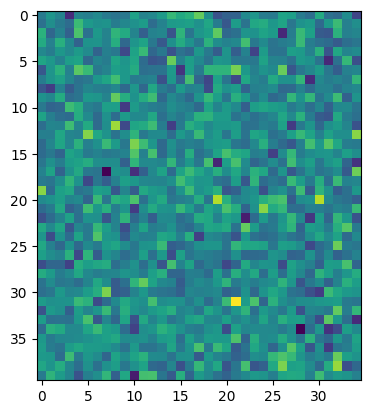

In [ ]:
distorted_letters = [distort_letter(letter) for letter in letters]

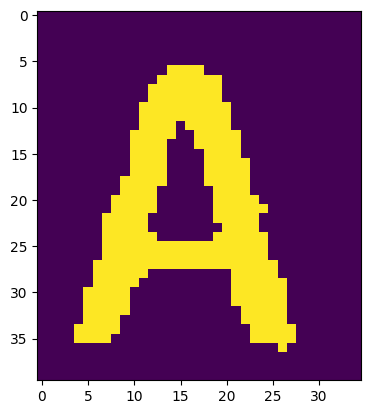

In [ ]:
plt.imshow(distorted_letters[0])

In [ ]:
import random
import string

encoding = {
    "A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7, "I": 8, "J": 9,
    "K": 10, "L": 11, "M": 12, "N": 13, "O": 14, "P": 15, "Q": 16, "R": 17, "S": 18,
    "T": 19, "U": 20, "V": 21, "W": 22, "X": 23, "Y": 24, "Z": 25
}

letters_to_generate = {
    "A": 30, "B": 10, "C": 10, "D": 30, "E": 15, "F": 20, "G": 10, "H": 10, "I": 10, "J": 10,
    "K": 10, "L": 15, "M": 15, "N": 20, "O": 30, "P": 30, "Q": 30, "R": 20, "S": 20,
    "T": 20, "U": 20, "V": 30, "W": 30, "X": 10, "Y": 10, "Z": 20
}

def identifier(letter: str):
  return encoding[letter]

def get_raw_letter(letter: str):
  return letters[identifier(letter)]

def generate_letter(letter: str):
  return distort_letter(get_raw_letter(letter))

def get_letter_dir(letter: str):
  return os.path.join(letter_dir, str(identifier(letter)))

def generate_letter_dirs():
  for letter in encoding.keys():
    os.makedirs(get_letter_dir(letter), exist_ok=True)

def get_letter_filepath(letter: str):
  path = os.path.join(get_letter_dir(letter), generate_random_string(7)) + ".png"
  return path

def generate_random_string(length=7):
  characters = string.ascii_lowercase + string.digits  # Letters + digits
  return ''.join(random.choice(characters) for _ in range(length))

def generate_and_save_letter(letter: str):
  generated_letter = generate_letter(letter)
  try:
    cv2.imwrite(get_letter_filepath(letter), generated_letter)
  except Exception:
    pass

In [ ]:
generate_letter_dirs()

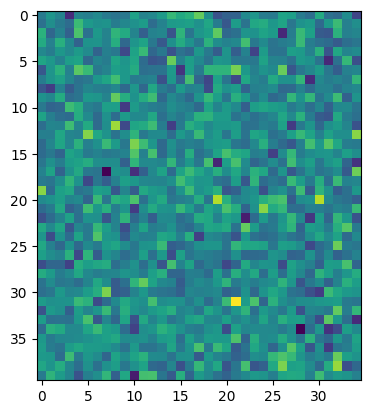

In [ ]:
for letter, num_to_generate in letters_to_generate.items():
  for _ in range(num_to_generate):
    generate_and_save_letter(letter)